This code is provided for reference. It downloads CIFAR-10, selects a subset of the data, and converts it into a familiar format for you to work with.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import os
from six.moves import urllib
from six.moves import cPickle 
import sys
import tarfile

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit    

from scipy import stats

In [0]:
def download_cifar10(dest_directory):
    """Download and extract the dataset from Alex's website."""
    print("Downloading CIFAR-10 (about 170 MB)")
    
    DATA_URL = 'http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
        
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    
    if os.path.exists(filepath):
        print("File already exists. Delete it first if you'd like to download again.")
        return
        
    def _progress(count, block_size, total_size):
        sys.stdout.write('\r>> Downloading %s %.1f%%' % (filename, float(count * block_size) / float(total_size) * 100.0))
        sys.stdout.flush()

    filepath, _ = urllib.request.urlretrieve(DATA_URL, filepath, _progress)
    print()
    statinfo = os.stat(filepath)
    print('Successfully downloaded', filename, statinfo.st_size, 'bytes.')
    tarfile.open(filepath, 'r:gz').extractall(dest_directory)
    print("Extracted to", dest_directory)
        

In [0]:
dest_directory = "datasets/cifar-10"
download_cifar10(dest_directory)
extracted_path = dest_directory + "/cifar-10-batches-py"

File already exists. Delete it first if you'd like to download again.


In [0]:
def load_cifar_batch(filename):
    """ load single batch of cifar """
    datadict = cPickle.load(open(filename, 'rb'))
    X = datadict['data']
    y = datadict['labels']
    X = X.reshape(10000, 3, 32, 32)
    X = X.transpose(0,2,3,1)
    y = np.array(y)
    return X, y

def load_cifar10(data_dir):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(data_dir, 'data_batch_%d' % (b, ))
        X, Y = load_cifar_batch(f)
        xs.append(X)
        ys.append(Y)    
    X_test, y_test = load_cifar_batch(os.path.join(data_dir, 'test_batch'))
    xs.append(X_test)
    ys.append(y_test)  
    X = np.concatenate(xs)
    y = np.concatenate(ys)
    return X, y

In [0]:
X, y = load_cifar10(extracted_path)

In [0]:
X.shape, y.shape

((60000, 32, 32, 3), (60000,))

In [0]:
# Drop classes not in the first five
subset = np.where(y <= 2)
X = X[subset]
y = y[subset]

In [0]:
X = X.astype('float')
y = y.astype('uint8')

In [0]:
X, y = shuffle(X, y, random_state=42)

In [0]:
stats.itemfreq(y)

array([[   0, 6000],
       [   1, 6000],
       [   2, 6000]])

In [0]:
sss = StratifiedShuffleSplit(train_size=1500, n_splits=1, 
                             test_size=300, random_state=0)  

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [0]:
X_train.shape, stats.itemfreq(y_train)

((1500, 32, 32, 3), array([[  0, 500],
        [  1, 500],
        [  2, 500]]))

In [0]:
X_test.shape, stats.itemfreq(y_test)

((300, 32, 32, 3), array([[  0, 100],
        [  1, 100],
        [  2, 100]]))

In [0]:
type(X_train[0][0][0][0]), type(y_train[0])

(numpy.float64, numpy.uint8)

In [0]:
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))
print(X.shape)
print(y.shape)

(1800, 32, 32, 3)
(1800,)


In [0]:
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'][:3]

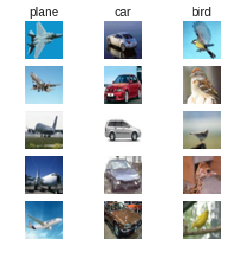

In [0]:
num_classes = len(class_names)
examples_per_class = 5
# We'll create a grid of plots, then populate them with images
f, ax = plt.subplots(examples_per_class, num_classes)
for class_idx in range(len(class_names)):
    # Find the indicies in the examples for this class
    matching_indices = np.where(y == class_idx)[0]
    np.random.shuffle(matching_indices) # shuffle in-place
    for example_n in range(examples_per_class):
        example = X[matching_indices[example_n]].astype('uint8')
        ax[example_n, class_idx].imshow(example)
        ax[example_n, class_idx].axis('off')
        plt.axis('off')
        if example_n == 0:
            ax[example_n, class_idx].set_title(class_names[class_idx])
f.set_size_inches(4,4)
plt.show() 

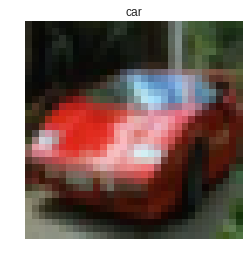

In [0]:
# The images are stored as floats but need to be converted to ints
# so they display properly
plt.imshow(X[0].astype('uint8'))
plt.title(class_names[y[0]])
plt.axis('off')
plt.show()

In [0]:
out = open('mini-cifar.npz', 'w')
np.savez_compressed(out, X, y, class_names, X=X, y=y, class_names=class_names)

In [0]:
loaded = np.load(open('mini-cifar.npz'))
print(loaded)
X_load, y_load = loaded["X"], loaded["y"]
X_load.shape, stats.itemfreq(y_load), y_load.shape

((1800, 32, 32, 3), array([[  0, 600],
        [  1, 600],
        [  2, 600]]), (1800,))